1. Load the data and libraries
2. Data Preparation and Data Transformation
3. Data Visualization
4. Data Analysis
   1. Uni Variate
   2. Bi- Variate
   3. Multi- Variate
      1. Classification
         1. Logistic Regression
         2. Decision Tree
         3. Random Forest
         4. Boosting
5. Evaluate the model
6. Apply the model to test data
7. Evaluate results using the submission data

Load the Libraries

# Load libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
!unzip '/content/stayalert (4).zip'

Archive:  /content/stayalert (4).zip
  inflating: Solution.csv            
  inflating: example_submission.csv  
  inflating: fordTest.csv            
  inflating: fordTrain.csv           


Import the data

In [ ]:
train = pd.read_csv('/content/fordTrain.csv')
test = pd.read_csv('/content/fordTest.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [ ]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

<Axes: >

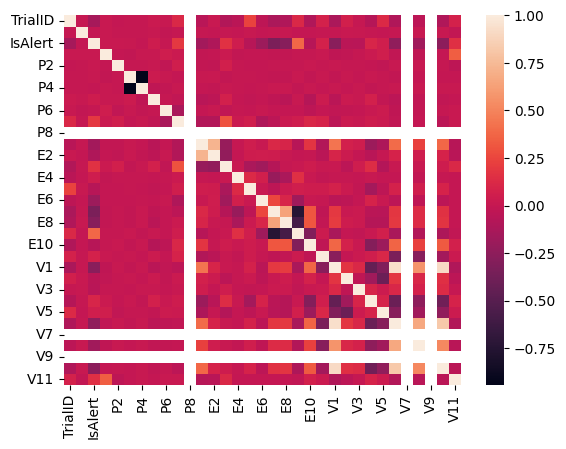

In [ ]:
sns.heatmap(train.corr())

# Data Preprocessing

Divide the data into Y & X

In [ ]:
y = train['IsAlert']
x = train.iloc[:,3:]

Split the data into train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(483463, 30)
(120866, 30)
(483463,)
(120866,)


# Multi-Variate Models

Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(x_train, y_train)
y_hat_train_logreg = log_reg.predict(x_train)
y_hat_test_logreg = log_reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  print("accuracy score",round(acc_score,2))
  print(conf_matrix)
  print(class_rep)

In [ ]:
model_eval(y_train,y_hat_train_logreg)

accuracy score 0.75
[[138685  64642]
 [ 54175 225961]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70    203327
           1       0.78      0.81      0.79    280136

    accuracy                           0.75    483463
   macro avg       0.75      0.74      0.75    483463
weighted avg       0.75      0.75      0.75    483463



In [ ]:
model_eval(y_test,y_hat_test_logreg)

accuracy score 0.75
[[34935 16282]
 [13539 56110]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     51217
           1       0.78      0.81      0.79     69649

    accuracy                           0.75    120866
   macro avg       0.75      0.74      0.75    120866
weighted avg       0.75      0.75      0.75    120866



decision tree model

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_dtree)

accuracy score 1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [ ]:
model_eval(y_test,y_hat_test_dtree)

accuracy score 0.99
[[50476   741]
 [  802 68847]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     51217
           1       0.99      0.99      0.99     69649

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [ ]:
model_eval(y_train, y_hat_train_rf)

accuracy score 1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [ ]:
model_eval(y_test, y_hat_test_rf)

accuracy score 0.99
[[50666   551]
 [   92 69557]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [ ]:
importances = rf.feature_importances_


In [ ]:
importances_df = pd.DataFrame({'feature': x_train.columns, 'importance': importances})

In [ ]:
importances_df = importances_df.sort_values('importance', ascending=False)

In [ ]:
importances_df

,feature,importance
29,V11,0.151518
17,E10,0.092510
15,E8,0.068490
5,P6,0.059917
16,E9,0.059453
14,E7,0.056411
6,P7,0.055644
13,E6,0.055568
19,V1,0.054107
24,V6,0.047787


In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train,y_train)
y_train_ada=ada.predict(x_train)
y_test_ada=ada.predict(x_test)

In [ ]:
model_eval(y_train,y_train_ada)

accuracy score 0.86
[[160509  42818]
 [ 24340 255796]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83    203327
           1       0.86      0.91      0.88    280136

    accuracy                           0.86    483463
   macro avg       0.86      0.85      0.86    483463
weighted avg       0.86      0.86      0.86    483463



In [ ]:
model_eval(y_test,y_test_ada)

accuracy score 0.86
[[40521 10696]
 [ 5929 63720]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     51217
           1       0.86      0.91      0.88     69649

    accuracy                           0.86    120866
   macro avg       0.86      0.85      0.86    120866
weighted avg       0.86      0.86      0.86    120866



# gradient boosting

In [ ]:
gb=GradientBoostingClassifier(n_estimators=150)
gb.fit(x_train,y_train)
y_hat_train_gb=gb.predict(x_train)
y_hat_test_gb=gb.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_gb)

accuracy score 0.9
[[168085  35242]
 [ 14131 266005]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87    203327
           1       0.88      0.95      0.92    280136

    accuracy                           0.90    483463
   macro avg       0.90      0.89      0.89    483463
weighted avg       0.90      0.90      0.90    483463



In [ ]:
model_eval(y_test,y_hat_test_gb)

accuracy score 0.9
[[42318  8899]
 [ 3449 66200]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     51217
           1       0.88      0.95      0.91     69649

    accuracy                           0.90    120866
   macro avg       0.90      0.89      0.89    120866
weighted avg       0.90      0.90      0.90    120866



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier(n_estimator=200)

In [ ]:
xgb.fit(x_train,y_train)
y_hat_train_xgb=xgb.predict(x_train)
y_hat_test_xgb=xgb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:12:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
model_eval(y_train,y_hat_train_xgb)

accuracy score 0.96
[[186745  16582]
 [  3842 276294]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95    203327
           1       0.94      0.99      0.96    280136

    accuracy                           0.96    483463
   macro avg       0.96      0.95      0.96    483463
weighted avg       0.96      0.96      0.96    483463



In [ ]:
model_eval(y_test,y_hat_test_xgb)

accuracy score 0.96
[[46906  4311]
 [ 1039 68610]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     51217
           1       0.94      0.99      0.96     69649

    accuracy                           0.96    120866
   macro avg       0.96      0.95      0.95    120866
weighted avg       0.96      0.96      0.96    120866

